In [103]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import (RBF,RationalQuadratic)
import matplotlib.pyplot as plt
%matplotlib inline


# Need to import full dataset, not just training

In [104]:
!echo %cd%

C:\Users\Mike\Documents\Analytics\Courses\NYC_DSA\R_studio\Projects\ML_impacts\Python


In [105]:
ML_data = pd.read_csv("ML_dataset.csv") 

In [106]:
ML_data.head()

,OCC_CODE,OCC_TITLE,fine_arts,finger_dexterity,manual_dexterity,social_perceptiveness,Negotiation,Originality,Persuasion,assisting_and_caring,label_ML,probability_ML,prob_est
0,11-1011,Chief Executives,0.290000,2.130,0.000000,4.380000,4.500,4.500000,5.000000,2.420000,0,0.0150,0.020272
1,11-3071,"Transportation, Storage, and Distribution Mana...",0.186667,1.790,0.626667,3.750000,3.540,3.126667,3.456667,2.533333,0,0.5900,0.172930
2,11-9151,Social and Community Service Managers,1.220000,2.250,0.000000,4.750000,3.750,4.120000,3.880000,5.510000,0,0.0067,0.000511
3,13-1031,"Claims Adjusters, Examiners, and Investigators",0.175000,2.315,1.185000,3.250000,3.685,2.500000,3.190000,2.320000,1,0.9800,0.546614
4,13-1041,Compliance Officers,0.111667,2.710,1.668333,3.683333,3.145,3.315000,3.438333,3.248333,0,0.0800,0.133712


In [107]:
ML_train = ML_data[ML_data['label_ML']>=0]
X_train = ML_train.filter(['fine_arts','finger_dexterity','manual_dexterity','social_perceptiveness','Negotiation','Persuasion','assisting_and_caring'])
y_train = ML_train.filter(['label_ML'])

In [108]:
X_train = X_train/6
print(X_train.shape)
print(ML_data.shape)

(68, 7)
(68, 13)


In [109]:
#kernel = 1.0 * RBF(1.0)
kernel = 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X_train, y_train)
gpc.score(X_train, y_train)

C:\Users\Mike\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8529411764705882

In [110]:
GP_est = pd.DataFrame(gpc.predict_proba(X_train))

In [111]:
ML_output = pd.concat([ML_train,GP_est],axis=1,ignore_index= True)

In [112]:
ML_output.columns = ['OCC_CODE','OCC_TITLE','fine_arts','finger_dexterity',
                     'manual_dexterity','social_perceptiveness','Negotiation',
                     'Originality','Persuasion','assisting_and_caring','label_ML',
                     'probability_ML','prob_est','GP_pred_0','GP_pred_1']

In [113]:
ML_output

,OCC_CODE,OCC_TITLE,fine_arts,finger_dexterity,manual_dexterity,social_perceptiveness,Negotiation,Originality,Persuasion,assisting_and_caring,label_ML,probability_ML,prob_est,GP_pred_0,GP_pred_1
0,11-1011,Chief Executives,0.290000,2.130,0.000000,4.380000,4.500,4.500000,5.000000,2.420000,0,0.0150,0.020272,0.927513,0.072487
1,11-3071,"Transportation, Storage, and Distribution Mana...",0.186667,1.790,0.626667,3.750000,3.540,3.126667,3.456667,2.533333,0,0.5900,0.172930,0.627969,0.372031
2,11-9151,Social and Community Service Managers,1.220000,2.250,0.000000,4.750000,3.750,4.120000,3.880000,5.510000,0,0.0067,0.000511,0.949024,0.050976
3,13-1031,"Claims Adjusters, Examiners, and Investigators",0.175000,2.315,1.185000,3.250000,3.685,2.500000,3.190000,2.320000,1,0.9800,0.546614,0.433585,0.566415
4,13-1041,Compliance Officers,0.111667,2.710,1.668333,3.683333,3.145,3.315000,3.438333,3.248333,0,0.0800,0.133712,0.790951,0.209049
5,13-1051,Cost Estimators,0.290000,2.120,0.120000,3.250000,3.250,3.250000,3.750000,1.890000,1,0.5700,0.694834,0.459376,0.540624
6,13-1074,Farm Labor Contractors,0.380000,1.500,2.500000,3.000000,3.000,2.000000,2.880000,2.800000,1,0.9700,0.374924,0.497198,0.502802
7,13-1121,"Meeting, Convention, and Event Planners",0.610000,2.380,2.120000,3.500000,3.620,3.500000,3.380000,3.050000,0,0.0370,0.063566,0.827813,0.172187
8,13-1121,"Meeting, Convention, and Event Planners*",0.610000,2.380,2.120000,3.500000,3.620,3.500000,3.380000,3.050000,0,0.0370,0.063566,0.827813,0.172187
9,13-1161,Market Research Analysts and Marketing Special...,0.330000,2.250,0.000000,3.380000,2.750,3.250000,3.380000,1.830000,1,0.6100,0.575467,0.344713,0.655287


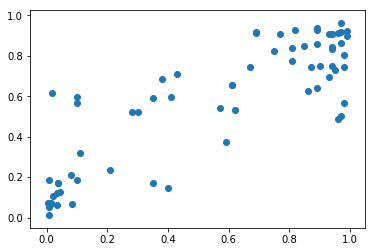

In [114]:
plt.scatter(ML_output['probability_ML'], ML_output['GP_pred_1'])

# Analysis of full dataset 

In [115]:
X_all = ML_data.filter(['fine_arts','finger_dexterity','manual_dexterity','social_perceptiveness','Negotiation','Persuasion'])
print(X_all.shape)
X_all = X_all/6
GP_est = pd.DataFrame(gpc.predict_proba(X_all))
ML_output = pd.concat([ML_data,GP_est],axis=1,ignore_index= True)
ML_output.columns = ['OCC_CODE','OCC_TITLE','fine_arts','finger_dexterity',
                     'manual_dexterity','social_perceptiveness','Negotiation',
                     'Originality','Persuasion','label_ML','probability_ML','prob_est',
                     'GP_pred_0','GP_pred_1']


(68, 6)


ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

In [ ]:
plt.scatter(ML_output['probability_ML'], ML_output['GP_pred_1'])